In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("data/clean_censusincome")

In [3]:
data

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,native-country,income_class
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,40.0,United-States,0
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,13.0,United-States,0
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,40.0,United-States,0
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,40.0,United-States,0
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,40.0,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48808,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,36.0,United-States,0
48809,64,Private,HS-grad,9.0,Widowed,Prof-specialty,Other-relative,Black,Male,0.0,40.0,United-States,0
48810,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,50.0,United-States,0
48811,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,40.0,United-States,0


In [4]:
X = data.iloc[:,0:12]
Y = data['income_class']

In [5]:
X

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,13.0,United-States
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,40.0,United-States
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,40.0,United-States
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,40.0,Cuba
...,...,...,...,...,...,...,...,...,...,...,...,...
48808,39,Private,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,36.0,United-States
48809,64,Private,HS-grad,9.0,Widowed,Prof-specialty,Other-relative,Black,Male,0.0,40.0,United-States
48810,38,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,50.0,United-States
48811,44,Private,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,40.0,United-States


In [6]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
48808    0
48809    0
48810    0
48811    0
48812    1
Name: income_class, Length: 48813, dtype: int64

In [7]:
## Define which column shoulbe be ordinal-encoded and which should be scaled
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(exclude='object').columns

print(f'Categorical Features: {categorical_cols}')
print(f'Numerical Features: {numerical_cols}')

Categorical Features: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')
Numerical Features: Index(['age', 'education-num', 'capital-gain', 'hours-per-week'], dtype='object')


In [8]:
from sklearn.impute import SimpleImputer #Handling Missing Values
from sklearn.preprocessing import StandardScaler #Handling Feature Scaling
from sklearn.preprocessing import OneHotEncoder #Encoding
#Pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [9]:
#numerical pipeline
num_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

#categorical pipeline
cat_pipeline = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('one_hot_encoder', OneHotEncoder(sparse_output=False)),
        ('scaler',StandardScaler())
    ]
)

#Pipeline
preprocessor = ColumnTransformer([
    ('num_pipeline',num_pipeline,numerical_cols),
    ('cat_pipeline',cat_pipeline,categorical_cols)
]
)

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [11]:
X_train.columns
columns = ['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'hours-per-week', 'native-country']

In [12]:
X_train = pd.DataFrame(
    preprocessor.fit_transform(X_train),
    columns=preprocessor.get_feature_names_out()
)

In [13]:
X_train

,num_pipeline__age,num_pipeline__education-num,num_pipeline__capital-gain,num_pipeline__hours-per-week,cat_pipeline__workclass_Federal-gov,cat_pipeline__workclass_Local-gov,cat_pipeline__workclass_Never-worked,cat_pipeline__workclass_Private,cat_pipeline__workclass_Self-emp-inc,cat_pipeline__workclass_Self-emp-not-inc,...,cat_pipeline__native-country_Portugal,cat_pipeline__native-country_Puerto-Rico,cat_pipeline__native-country_Scotland,cat_pipeline__native-country_South,cat_pipeline__native-country_Taiwan,cat_pipeline__native-country_Thailand,cat_pipeline__native-country_Trinadad&Tobago,cat_pipeline__native-country_United-States,cat_pipeline__native-country_Vietnam,cat_pipeline__native-country_Yugoslavia
0,2.287448,1.913796,0.199612,0.372429,-0.172626,-0.261533,-0.014315,0.573112,-0.190463,-0.292879,...,-0.038568,-0.060838,-0.020869,-0.050415,-0.035806,-0.024799,-0.023742,0.305027,-0.042979,-0.023742
1,-0.628180,-0.807172,-0.144226,0.291775,-0.172626,-0.261533,-0.014315,0.573112,-0.190463,-0.292879,...,-0.038568,-0.060838,-0.020869,-0.050415,-0.035806,-0.024799,-0.023742,0.305027,-0.042979,-0.023742
2,1.485650,1.136376,-0.144226,0.372429,-0.172626,-0.261533,-0.014315,0.573112,-0.190463,-0.292879,...,-0.038568,-0.060838,-0.020869,-0.050415,-0.035806,-0.024799,-0.023742,0.305027,-0.042979,-0.023742
3,-1.211305,-0.029753,-0.144226,-0.837387,-0.172626,-0.261533,-0.014315,0.573112,-0.190463,-0.292879,...,-0.038568,-0.060838,-0.020869,-0.050415,-0.035806,-0.024799,-0.023742,0.305027,-0.042979,-0.023742
4,-1.284196,-0.029753,-0.144226,-0.030843,-0.172626,3.823611,-0.014315,-1.744860,-0.190463,-0.292879,...,-0.038568,-0.060838,-0.020869,-0.050415,-0.035806,-0.024799,-0.023742,-3.278398,-0.042979,-0.023742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39045,-1.065524,-0.418463,-0.144226,-1.643931,-0.172626,-0.261533,-0.014315,-1.744860,-0.190463,-0.292879,...,-0.038568,-0.060838,-0.020869,-0.050415,-0.035806,-0.024799,-0.023742,0.305027,-0.042979,-0.023742
39046,0.975416,-0.418463,0.557269,-0.030843,-0.172626,-0.261533,-0.014315,0.573112,-0.190463,-0.292879,...,-0.038568,-0.060838,-0.020869,-0.050415,-0.035806,-0.024799,-0.023742,0.305027,-0.042979,-0.023742
39047,0.902525,-1.584592,-0.144226,1.582245,-0.172626,-0.261533,-0.014315,-1.744860,5.250353,-0.292879,...,-0.038568,-0.060838,-0.020869,-0.050415,-0.035806,-0.024799,-0.023742,0.305027,-0.042979,-0.023742
39048,-1.502868,-1.195882,-0.144226,-1.643931,-0.172626,-0.261533,-0.014315,0.573112,-0.190463,-0.292879,...,-0.038568,-0.060838,-0.020869,-0.050415,-0.035806,-0.024799,-0.023742,0.305027,-0.042979,-0.023742


In [23]:
X_train.columns

Index(['num_pipeline__age', 'num_pipeline__education-num',
       'num_pipeline__capital-gain', 'num_pipeline__hours-per-week',
       'cat_pipeline__workclass_Federal-gov',
       'cat_pipeline__workclass_Local-gov',
       'cat_pipeline__workclass_Never-worked',
       'cat_pipeline__workclass_Private',
       'cat_pipeline__workclass_Self-emp-inc',
       'cat_pipeline__workclass_Self-emp-not-inc',
       ...
       'cat_pipeline__native-country_Portugal',
       'cat_pipeline__native-country_Puerto-Rico',
       'cat_pipeline__native-country_Scotland',
       'cat_pipeline__native-country_South',
       'cat_pipeline__native-country_Taiwan',
       'cat_pipeline__native-country_Thailand',
       'cat_pipeline__native-country_Trinadad&Tobago',
       'cat_pipeline__native-country_United-States',
       'cat_pipeline__native-country_Vietnam',
       'cat_pipeline__native-country_Yugoslavia'],
      dtype='object', length=102)

In [21]:
X_test = pd.DataFrame(preprocessor.transform(X_test))

ValueError: Found unknown categories ['Holand-Netherlands'] in column 7 during transform

In [27]:
X_test[X_test['native-country'] == "Holand-Netherlands"]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,native-country
19600,32,Private,Some-college,10.0,Never-married,Machine-op-inspct,Other-relative,White,Female,0.0,40.0,Holand-Netherlands


In [29]:
X_test.drop(index=19600,inplace=True)

In [30]:
X_test[X_test['native-country'] == "Holand-Netherlands"]

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,hours-per-week,native-country


In [31]:
X_test = pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [32]:
X_test.head()

,num_pipeline__age,num_pipeline__education-num,num_pipeline__capital-gain,num_pipeline__hours-per-week,cat_pipeline__workclass_Federal-gov,cat_pipeline__workclass_Local-gov,cat_pipeline__workclass_Never-worked,cat_pipeline__workclass_Private,cat_pipeline__workclass_Self-emp-inc,cat_pipeline__workclass_Self-emp-not-inc,...,cat_pipeline__native-country_Portugal,cat_pipeline__native-country_Puerto-Rico,cat_pipeline__native-country_Scotland,cat_pipeline__native-country_South,cat_pipeline__native-country_Taiwan,cat_pipeline__native-country_Thailand,cat_pipeline__native-country_Trinadad&Tobago,cat_pipeline__native-country_United-States,cat_pipeline__native-country_Vietnam,cat_pipeline__native-country_Yugoslavia
0,1.704322,-0.418463,-0.144226,-0.030843,-0.172626,-0.261533,-0.014315,0.573112,-0.190463,-0.292879,...,-0.038568,-0.060838,-0.020869,-0.050415,-0.035806,-0.024799,-0.023742,0.305027,-0.042979,-0.023742
1,-0.628180,-0.029753,-0.144226,-0.030843,-0.172626,-0.261533,-0.014315,0.573112,-0.190463,-0.292879,...,-0.038568,-0.060838,-0.020869,-0.050415,-0.035806,-0.024799,-0.023742,0.305027,-0.042979,-0.023742
2,0.538071,-0.029753,-0.144226,0.372429,-0.172626,-0.261533,-0.014315,0.573112,-0.190463,-0.292879,...,-0.038568,-0.060838,-0.020869,-0.050415,-0.035806,-0.024799,-0.023742,0.305027,-0.042979,-0.023742
3,0.173618,1.136376,-0.144226,-0.030843,-0.172626,-0.261533,-0.014315,0.573112,-0.190463,-0.292879,...,-0.038568,-0.060838,-0.020869,-0.050415,-0.035806,-0.024799,-0.023742,0.305027,-0.042979,-0.023742
4,-1.065524,-0.418463,-0.144226,-1.240659,-0.172626,-0.261533,-0.014315,0.573112,-0.190463,-0.292879,...,-0.038568,-0.060838,-0.020869,-0.050415,-0.035806,-0.024799,-0.023742,0.305027,-0.042979,-0.023742


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Logistic Regression

In [34]:
logistic = LogisticRegression()

In [35]:
logistic.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred = logistic.predict(X_test)

In [37]:
import plotly.graph_objs as go

# Assuming you have y_test and y_pred defined

# Assuming y_test and y_pred are already defined with 30 samples
y_test_sample = y_test[:50]
y_pred_sample = y_pred[:50]

# Convert range to list for x-axis
x_values = list(range(len(y_test_sample)))

# Create traces for actual and predicted data points
trace_actual = go.Scatter(x=x_values, y=y_test_sample, mode='markers', name='Actual', marker=dict(color='green'))
trace_predicted = go.Scatter(x=x_values, y=y_pred_sample, mode='markers', name='Predicted', marker=dict(color='red'))

# Create a trace for the regression line
trace_regression = go.Scatter(x=x_values, y=y_pred_sample, mode='lines', name='Regression line', line=dict(color='blue', width=2))

# Combine traces into a data list
data = [trace_actual, trace_predicted, trace_regression]

# Define layout for the plot
layout = go.Layout(
    title='Comparison of Actual and Predicted Data Points with Regression Line',
    xaxis=dict(title='Data Point Index'),
    yaxis=dict(title='y'),
    hovermode='closest',  # Show closest data point's values upon hover
)

# Create figure object that combines data and layout
fig = go.Figure(data=data, layout=layout)

# Display the interactive plot
fig.show()


In [40]:
y_test.drop(index=19600,inplace=True)

In [41]:
accuracy_score(y_test,y_pred)

0.847879532882606

# Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

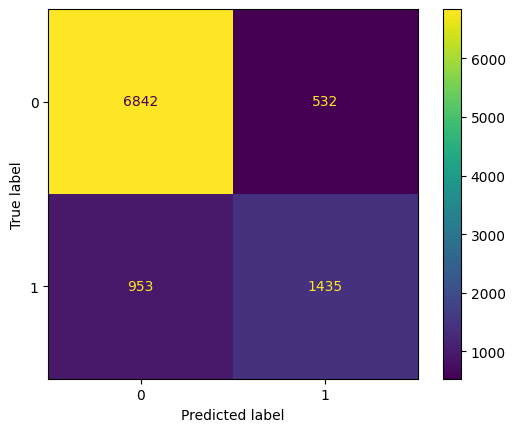

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()